In [48]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import gmean
import os
import statsmodels.api as sm
from pandas.tseries.offsets import MonthEnd
import warnings 
warnings.filterwarnings('always')
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

# The code is written with the help of OpenAI's Chatgpt.com.

# Question 1-2: Asset Universe

In [49]:
# Set path and file names
folder_path = './data/'
file_list = [
    'spx_totret_1995_monthly.xlsx',         # US Equities
    'UST30Y_totret_1995_monthly.xlsx',   # US Government Bond
    'HY_totret_1995_monthly.xlsx',    # US HY Corporate Bonds
    'gsci_totret_1995_monthly.xlsx', # Global Commodities
    'EURHY_data.xlsx', # EUR Corporate Bonds
    'EUREQ_data.xlsx', # EUR Equities
    'FXY_data.xlsx', # USDJPY ETF Total Return
     'Gold_data.xlsx', # Gold

]

sheet_name = 'Worksheet'
col_name = 'TOT_RETURN_INDEX_GROSS_DVDS'
start_date = pd.to_datetime('2010-01-01')

# Initialize container for all standardized returns
standardized_df = pd.DataFrame()

# Loop over files
for file in file_list:
    filepath = os.path.join(folder_path, file)
    
    # Extract asset name from filename
    asset_name = file.split('_')[0].upper()  # 'spx_totret_1995_monthly.xlsx' → 'SPX'

    # Load and clean data
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df = df.rename(columns={col_name: 'Total_Return_Index'}).dropna()
    df = df[df['Date'] >= start_date].copy()
    df = df.set_index('Date')

    # Compute monthly returns
    df['Return'] = df['Total_Return_Index'].pct_change()
    df = df.dropna()

    # Compute mean and volatility
    monthly_returns = df['Return']
    mean_return = gmean(1 + monthly_returns) - 1
    vol_return = monthly_returns.std()

    # Standardize return
    df[f'{asset_name}'] = (monthly_returns - mean_return) / vol_return

    # Add to master DataFrame
    standardized_df = pd.concat([standardized_df, df[[f'{asset_name}']]], axis=1).dropna()

# Reset index to have 'Date' as column
standardized_df = standardized_df.reset_index()
standardized_df_1 = standardized_df
display(standardized_df_1.head())
display(standardized_df_1.tail())

,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD
0,2010-03-31,1.184608,-0.530763,1.277132,0.397559,-0.397344,1.062714,-1.739296,-1.106774
1,2010-04-30,0.122757,0.751679,0.892005,0.613177,2.199185,2.424337,-0.066530,-0.530417
2,2010-06-30,-1.500856,1.276440,0.357045,0.226211,-1.672478,-1.920082,1.157514,1.318014
3,2010-08-31,-1.329079,1.959475,-0.231386,-0.836337,-1.159306,-1.795480,1.144543,-0.884953
4,2010-09-30,1.873141,-0.658468,1.217676,1.565948,-0.644847,-0.866383,0.338207,-0.661408


,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD
124,2024-10-31,-0.469507,-1.289861,-0.512055,0.027249,-0.027333,0.617184,-1.902411,0.843801
125,2024-12-31,-0.821469,-1.450095,-0.456465,0.423074,-0.062569,-1.291312,-1.730543,-1.284009
126,2025-01-31,0.410162,-0.016282,0.416141,0.361181,-0.252903,-0.443162,0.640791,-0.269920
127,2025-02-28,-0.564339,1.250348,0.077880,-0.263806,0.643485,0.082555,1.252147,-1.789744
128,2025-03-31,-1.596070,-0.366401,-0.746498,0.426099,0.074357,-0.547447,0.215081,-1.015440


In [50]:
# Set path and file names
folder_path = './data/'
file_list = [
    'EEM_monthly_prices.xlsx', # Emerging Market Equities
    'VNQ_monthly_prices.xlsx', # US Real estate ETF
    'IGF_monthly_prices.xlsx', # Global Infrastructure ETF
     'unemp_data.xlsx', # US Unemployment
     'CPI_data.xlsx', # US Inflation (CPI)
]

sheet_name = 'Worksheet'
col_name = 'TOT_RETURN_INDEX_GROSS_DVDS'
start_date = pd.to_datetime('2010-01-01')

# Initialize container for all standardized returns
standardized_df = pd.DataFrame()

# Loop over files
for file in file_list:
    filepath = os.path.join(folder_path, file)
    
    # Extract asset name from filename
    asset_name = file.split('_')[0].upper()  # 'spx_totret_1995_monthly.xlsx' → 'SPX'

    # Load and clean data
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df = df.rename(columns={col_name: 'Total_Return_Index'}).dropna()
    df = df[df['Date'] >= start_date].copy()
    df = df.set_index('Date')

    # Compute monthly returns
    df['Return'] = df['Total_Return_Index'].pct_change()
    df = df.dropna()

    # Compute mean and volatility
    monthly_returns = df['Return']
    mean_return = gmean(1 + monthly_returns) - 1
    vol_return = monthly_returns.std()

    # Standardize return
    df[f'{asset_name}'] = (monthly_returns - mean_return) / vol_return

    # Add to master DataFrame
    standardized_df = pd.concat([standardized_df, df[[f'{asset_name}']]], axis=1).dropna()

# Reset index to have 'Date' as column
standardized_df_2 = standardized_df.reset_index()
standardized_df_2['Date'] = standardized_df_2['Date'] + MonthEnd()
display(standardized_df_2.head())
display(standardized_df_2.tail())

,Date,EEM,VNQ,IGF,UNEMP,CPI
0,2010-04-30,-0.074012,1.400736,-0.424852,0.025688,-0.714625
1,2010-05-31,-1.829766,-1.150317,-2.500427,-0.142828,-0.998445
2,2010-06-30,-0.431933,-1.297221,-0.806843,-0.090167,-0.960223
3,2010-07-31,2.177581,1.914237,2.759368,0.025688,-0.094147
4,2010-08-31,-0.658261,-0.371159,-0.551676,0.084849,-0.248542


,Date,EEM,VNQ,IGF,UNEMP,CPI
176,2024-12-31,-0.675763,-1.901995,-1.503414,-0.106718,0.578661
177,2025-01-31,0.695247,0.379335,0.640709,-0.109947,0.965750
178,2025-02-28,0.175860,0.583960,-0.005591,0.164715,0.015639
179,2025-03-31,0.173387,-0.813164,0.379334,0.161324,-0.991094
180,2025-04-30,-0.016264,-0.402441,0.581431,0.025688,0.034419


In [51]:
# Merge Dataframe
merged_df = pd.merge(standardized_df_1, standardized_df_2, on='Date', how='inner')
display(merged_df.head())
display(merged_df.tail())

,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD,EEM,VNQ,IGF,UNEMP,CPI
0,2010-04-30,0.122757,0.751679,0.892005,0.613177,2.199185,2.424337,-0.066530,-0.530417,-0.074012,1.400736,-0.424852,0.025688,-0.714625
1,2010-06-30,-1.500856,1.276440,0.357045,0.226211,-1.672478,-1.920082,1.157514,1.318014,-0.431933,-1.297221,-0.806843,-0.090167,-0.960223
2,2010-08-31,-1.329079,1.959475,-0.231386,-0.836337,-1.159306,-1.795480,1.144543,-0.884953,-0.658261,-0.371159,-0.551676,0.084849,-0.248542
3,2010-09-30,1.873141,-0.658468,1.217676,1.565948,-0.644847,-0.866383,0.338207,-0.661408,2.194769,0.553082,1.516725,0.025688,-0.190293
4,2010-11-30,-0.250416,-0.487142,-0.817480,0.333811,-0.712199,-1.170027,-1.319898,-0.400942,-0.595230,-0.481689,-1.337143,0.262329,0.157414


,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD,EEM,VNQ,IGF,UNEMP,CPI
123,2024-10-31,-0.469507,-1.289861,-0.512055,0.027249,-0.027333,0.617184,-1.902411,0.843801,-0.627407,-0.614365,-0.411725,0.025688,0.055486
124,2024-12-31,-0.821469,-1.450095,-0.456465,0.423074,-0.062569,-1.291312,-1.730543,-1.284009,-0.675763,-1.901995,-1.503414,-0.106718,0.578661
125,2025-01-31,0.410162,-0.016282,0.416141,0.361181,-0.252903,-0.443162,0.640791,-0.269920,0.695247,0.379335,0.640709,-0.109947,0.965750
126,2025-02-28,-0.564339,1.250348,0.077880,-0.263806,0.643485,0.082555,1.252147,-1.789744,0.175860,0.583960,-0.005591,0.164715,0.015639
127,2025-03-31,-1.596070,-0.366401,-0.746498,0.426099,0.074357,-0.547447,0.215081,-1.015440,0.173387,-0.813164,0.379334,0.161324,-0.991094


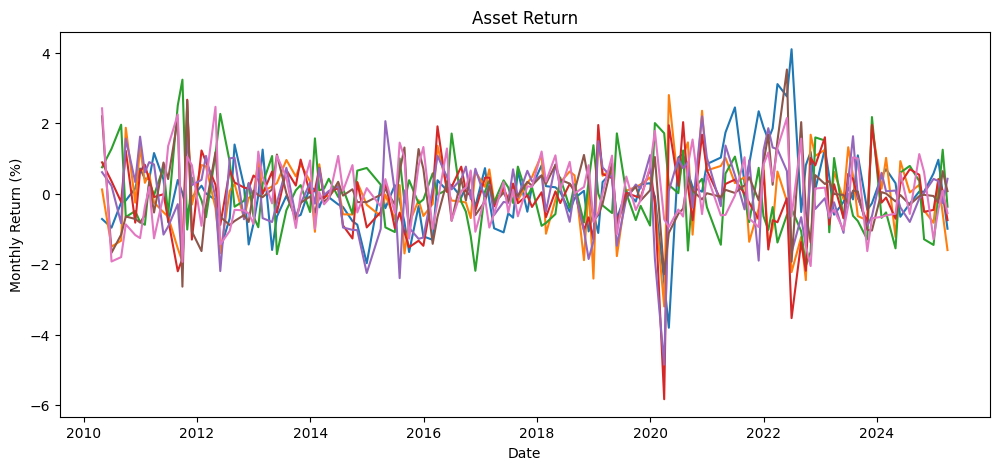

In [52]:
df_to_plot = merged_df
plt.figure(figsize=(12, 5))
plt.plot(df_to_plot['Date'], df_to_plot['CPI'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['SPX'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['UST30Y'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['HY'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['GSCI'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['EURHY'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['EUREQ'], '-')
plt.title('Asset Return')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.show()

##### Macro Factor DataFrame

# Question 3-4: Macro Data Relevance
### Regression Analysis
- From 2010-2024, empirically verify if the macro data series are relevant for the asset 
price series. You can do this via linear regression, as discussed in class, or via some 
other method. Explain and justify your approach.  

In [53]:
def time_series_regression(portfolio, factors, resid = False,start = '2010-01-01',end = '2024-12-31', intercept = False):
    
    ff_report = pd.DataFrame(index=portfolio.columns)
    bm_residuals = pd.DataFrame(columns=portfolio.columns)
    factors_reg = factors[(factors.index >= start) & (factors.index <= end)]
    portfolio_reg = portfolio[(portfolio.index >= start) & (portfolio.index <= end)]

    if intercept:
        X = sm.add_constant(factors)

    for portf in portfolio_reg.columns:
        y = portfolio_reg[portf]
        if not intercept:
            res = sm.OLS(y, factors_reg, missing='drop').fit()

            ff_report.loc[portf, 'beta_gold'] = res.params.iloc[0]
            ff_report.loc[portf, 'beta_cpi'] = res.params.iloc[1]
            ff_report.loc[portf, 'beta_unemp'] = res.params.iloc[2]
        else:
            res = sm.OLS(y, X, missing='drop').fit()

            ff_report.loc[portf, 'constant'] = res.params.loc['const']
            ff_report.loc[portf, 'beta_gold'] = res.params.iloc[0]
            ff_report.loc[portf, 'beta_cpi'] = res.params.iloc[1]
            ff_report.loc[portf, 'beta_unemp'] = res.params.iloc[2]
            

        if resid:
            bm_residuals[portf] = res.resid # returns a Data Frame of residuals 

    if resid: # returns a Data Frame of residuals 
        return bm_residuals
        
    return ff_report

In [54]:
macro_factors = merged_df[['GOLD','CPI','UNEMP','Date']].set_index('Date')
assets = merged_df.drop(columns = ['GOLD','CPI','UNEMP']).set_index('Date')
time_series_regression = time_series_regression(assets, macro_factors, intercept = False)
display(time_series_regression)

,beta_gold,beta_cpi,beta_unemp
SPX,0.010160,0.079394,0.186411
UST30Y,-0.096065,-0.240880,-0.041710
HY,-0.002577,0.016904,0.091766
GSCI,0.065035,0.341934,0.061267
EURHY,0.177027,0.137664,-0.050167
EUREQ,0.278103,0.064784,-0.051801
FXY,-0.080475,-0.175266,-0.046094
EEM,0.007020,0.038555,0.079444
VNQ,-0.062745,-0.009838,0.084410
IGF,-0.030851,0.081587,0.095638


# Regression on Single Macro Variable

In [55]:
# y-values
asset_returns = pd.DataFrame({
    'SPX': merged_df['SPX'],
    'UST30Y': merged_df['UST30Y'],
    'HY': merged_df['HY'],
    'GSCI': merged_df['GSCI'],
    'EURHY': merged_df['EURHY'],
    'EUREQ': merged_df['EUREQ'],
    'FXY': merged_df['FXY'],
    'EEM': merged_df['EEM'],
    'VNQ': merged_df['VNQ'],
    'IGF': merged_df['IGF'],
})

# x-values
x_values_list = ['GOLD', 'UNEMP', 'CPI']

for macro_asset in x_values_list:
    macro_data = pd.DataFrame({
        f'{macro_asset}': merged_df[f'{macro_asset}'],
    })

    data = pd.merge(asset_returns, macro_data, left_index=True, right_index=True, how='inner')
    X = data[macro_data.columns]
    Y = data[asset_returns.columns]
    results = []

    for asset in Y.columns:
        y = Y[asset]
        model = sm.OLS(y, X).fit()
        
        # Model Results
        coefficient_on_X = model.params.iloc[0] # Coefficient on Macro Variable
        r_squared = model.rsquared * 100 # Show in Percent
        rsquared_adj = model.rsquared_adj * 100 # Show in Percent
        p_val = model.pvalues.iloc[0] * 100 # Show in Percent
        f_statistic = model.fvalue
        MSE = mean_squared_error(y, model.fittedvalues)
        
        results.append({
            'Asset': asset,
            'R-Squared (%)': r_squared,
            'Coefficients': coefficient_on_X,
            'P-Value (%)': p_val,
        })
    regression_results = pd.DataFrame(results)
    regression_results = regression_results.sort_values(by='R-Squared (%)', ascending=False)
    print(f"Regression of asset returns (y) on {macro_asset} (x):")
    display(regression_results.head())

Regression of asset returns (y) on GOLD (x):


,Asset,R-Squared (%),Coefficients,P-Value (%)
5,EUREQ,8.131834,0.277205,0.105438
4,EURHY,3.534502,0.166773,3.287719
1,UST30Y,1.172589,-0.107802,22.188980
6,FXY,0.915085,-0.097876,28.085984
8,VNQ,0.416004,-0.069360,46.772388


Regression of asset returns (y) on UNEMP (x):


,Asset,R-Squared (%),Coefficients,P-Value (%)
0,SPX,3.430747,0.158341,3.559978
4,EURHY,1.932766,-0.101936,11.611766
5,EUREQ,1.152402,-0.086255,22.593503
8,VNQ,1.029214,0.090176,25.262710
2,HY,0.950118,0.085620,27.179625


Regression of asset returns (y) on CPI (x):


,Asset,R-Squared (%),Coefficients,P-Value (%)
3,GSCI,9.494596,0.310964,0.038159
1,UST30Y,5.217683,-0.217933,0.922382
4,EURHY,3.407669,0.156936,3.623639
6,FXY,2.363969,-0.150764,8.192053
5,EUREQ,0.935511,0.090108,27.553033


# Specified Sample

,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD,EEM,VNQ,IGF,UNEMP,CPI
0,2010-04-30,0.122757,0.751679,0.892005,0.613177,2.199185,2.424337,-0.066530,-0.530417,-0.074012,1.400736,-0.424852,0.025688,-0.714625
1,2010-06-30,-1.500856,1.276440,0.357045,0.226211,-1.672478,-1.920082,1.157514,1.318014,-0.431933,-1.297221,-0.806843,-0.090167,-0.960223


,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD,EEM,VNQ,IGF,UNEMP,CPI
47,2015-11-30,-0.182574,-0.272786,-1.330749,-1.277509,1.270613,0.795249,-0.630570,0.228179,-0.522584,-0.246396,-1.051736,0.136910,-0.349511
48,2015-12-31,-0.629258,-0.161975,-1.474838,-1.240108,0.708519,1.328000,0.990602,-1.012595,-1.050035,-0.044029,-1.180970,-0.083352,-1.208820


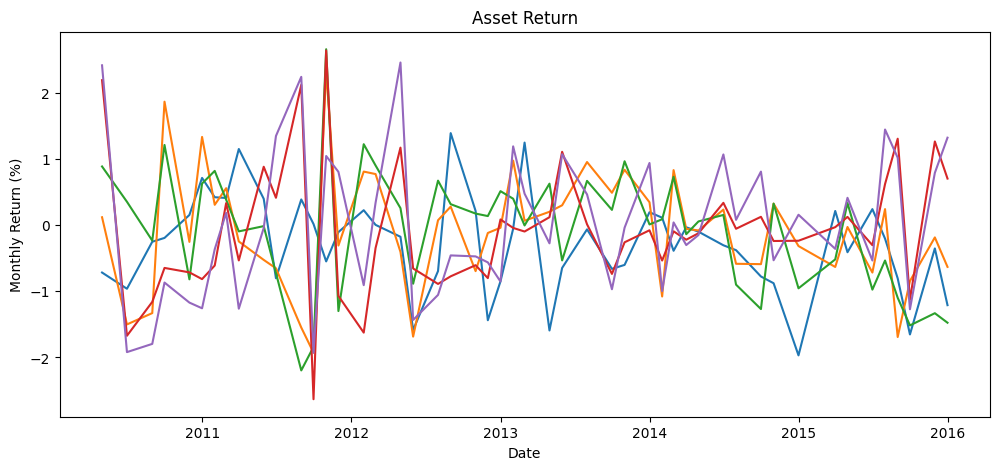

In [56]:
# Using Macro Regime: Post 2008 Economic Boom: Low interest rate period (Gold & unemployment should fall, CPI start low and steadily increase)
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2016-01-01')
merged_df_2 = merged_df[(merged_df['Date'] >= start_date) & 
                        (merged_df['Date'] <= end_date)].copy()
display(merged_df_2.head(2))
display(merged_df_2.tail(2))

df_to_plot = merged_df_2
plt.figure(figsize=(12, 5))
plt.plot(df_to_plot['Date'], df_to_plot['CPI'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['SPX'], '-')
# plt.plot(df_to_plot['Date'], df_to_plot['UST30Y'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['HY'], '-')
# plt.plot(df_to_plot['Date'], df_to_plot['GSCI'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['EURHY'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['EUREQ'], '-')
plt.title('Asset Return')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.show()

In [57]:
# y-values
asset_returns = pd.DataFrame({
    'SPX': merged_df_2['SPX'],
    'UST30Y': merged_df_2['UST30Y'],
    'HY': merged_df_2['HY'],
    'GSCI': merged_df_2['GSCI'],
    'EURHY': merged_df_2['EURHY'],
    'EUREQ': merged_df_2['EUREQ'],
    'FXY': merged_df_2['FXY'],
    'EEM': merged_df_2['EEM'],
    'VNQ': merged_df_2['VNQ'],
    'IGF': merged_df_2['IGF'],
})

# x-values
x_values_list = ['GOLD', 'UNEMP', 'CPI']

for macro_asset in x_values_list:
    macro_data = pd.DataFrame({
        f'{macro_asset}': merged_df_2[f'{macro_asset}'],
    })

    data = pd.merge(asset_returns, macro_data, left_index=True, right_index=True, how='inner')
    X = data[macro_data.columns]
    Y = data[asset_returns.columns]
    results = []

    for asset in Y.columns:
        y = Y[asset]
        model = sm.OLS(y, X).fit()
        
        # Model Results
        coefficient_on_X = model.params.iloc[0] # Coefficient on Macro Variable
        r_squared = model.rsquared * 100 # Show in Percent
        rsquared_adj = model.rsquared_adj * 100 # Show in Percent
        p_val = model.pvalues.iloc[0] * 100 # Show in Percent
        f_statistic = model.fvalue
        MSE = mean_squared_error(y, model.fittedvalues)
        
        results.append({
            'Asset': asset,
            'R-Squared (%)': r_squared,
            'Coefficients': coefficient_on_X,
            'P-Value (%)': p_val,
        })
    regression_results = pd.DataFrame(results)

    regression_results = regression_results.sort_values(by='R-Squared (%)', ascending=False)
    print(f"Regression of asset returns (y) on {macro_asset} (x):")
    display(regression_results.head())

Regression of asset returns (y) on GOLD (x):


,Asset,R-Squared (%),Coefficients,P-Value (%)
5,EUREQ,6.506764,0.242263,7.380879
4,EURHY,2.875302,0.144653,23.909869
3,GSCI,1.155762,0.097436,45.741192
8,VNQ,0.963819,-0.082745,49.759410
2,HY,0.655877,-0.064828,57.609708


Regression of asset returns (y) on UNEMP (x):


,Asset,R-Squared (%),Coefficients,P-Value (%)
6,FXY,6.353642,-1.774645,7.740930
8,VNQ,0.477131,-0.544392,63.361303
4,EURHY,0.385600,0.495338,66.836159
7,EEM,0.371938,0.571399,67.395537
0,SPX,0.289076,-0.385983,71.076129


Regression of asset returns (y) on CPI (x):


,Asset,R-Squared (%),Coefficients,P-Value (%)
3,GSCI,15.001947,0.522111,0.545439
1,UST30Y,4.278428,-0.266994,14.951389
0,SPX,3.780680,0.222027,17.603143
9,IGF,3.183643,0.209833,21.507169
2,HY,2.354348,0.182681,28.739678


### 5. 
- Should your estimation sample period be different? Why or why not? If it should be 
different, adjust it and do your analysis on the altered sample. 

# Question 9-11: PCA Analysis

In [58]:
# PCA Analysis Prep: Dataframe has to have date as index, each column is values for each variable (e.g., asset)
df_for_pca = merged_df.set_index('Date')
display(df_for_pca.head())

,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD,EEM,VNQ,IGF,UNEMP,CPI
Date,,,,,,,,,,,,,
2010-04-30,0.122757,0.751679,0.892005,0.613177,2.199185,2.424337,-0.066530,-0.530417,-0.074012,1.400736,-0.424852,0.025688,-0.714625
2010-06-30,-1.500856,1.276440,0.357045,0.226211,-1.672478,-1.920082,1.157514,1.318014,-0.431933,-1.297221,-0.806843,-0.090167,-0.960223
2010-08-31,-1.329079,1.959475,-0.231386,-0.836337,-1.159306,-1.795480,1.144543,-0.884953,-0.658261,-0.371159,-0.551676,0.084849,-0.248542
2010-09-30,1.873141,-0.658468,1.217676,1.565948,-0.644847,-0.866383,0.338207,-0.661408,2.194769,0.553082,1.516725,0.025688,-0.190293
2010-11-30,-0.250416,-0.487142,-0.817480,0.333811,-0.712199,-1.170027,-1.319898,-0.400942,-0.595230,-0.481689,-1.337143,0.262329,0.157414


,1,2,3,4,5,6,7,8,9,10,11,12,13
Variation Explained,36.40%,16.68%,10.99%,10.11%,6.14%,5.41%,4.70%,2.73%,1.86%,1.56%,1.47%,1.09%,0.87%


,1,2,3,4,5,6,7,8,9,10,11,12,13
Cumulative Variation Explained,36.40%,53.08%,64.07%,74.18%,80.32%,85.72%,90.42%,93.15%,95.01%,96.58%,98.05%,99.13%,100.00%


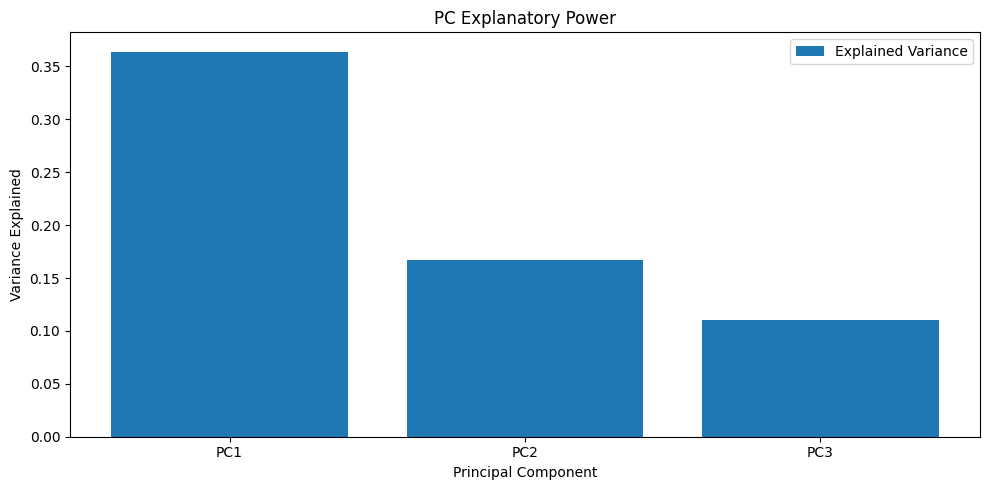

In [59]:
# Extract the explained variance ratios for the first 5 principal components and add the cumulative explained variance ratio. 
# Plot the results using a bar plot.

# PCA Analysis

# Compute principal components using a full Singular Value Decomposition (SVD)
pca = PCA(svd_solver='full')
# Fits the PCA model to the dataset
pca.fit(df_for_pca)

# Make a new dataframe for the Variation Explained by each Principal Component
pca_var_explained = pd.DataFrame(pca.explained_variance_ratio_, columns=['Variation Explained']).T
pca_var_explained.columns = list(np.arange(1, 14, 1))
display(pca_var_explained.style.format('{:.2%}'.format))

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
pca_cum_var_explained = pd.DataFrame(cumulative_variance, columns=['Cumulative Variation Explained']).T
pca_cum_var_explained.columns = list(np.arange(1, 14, 1))
display(pca_cum_var_explained.style.format('{:.2%}'.format))

# Bar Graph
x_axis_values = ['PC1', 'PC2', 'PC3']
y_axis_values = pca.explained_variance_ratio_[:3] # Not cumulative
# y_axis_values = np.cumsum(pca.explained_variance_ratio_)[:3] # Cumulative

plt.figure(figsize=(10, 5))
plt.bar(x_axis_values, y_axis_values, label='Explained Variance')
plt.title('PC Explanatory Power')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
# Display and plot the (factor loadings of the) first 3 principal components.

# Factor Loadings (use the appropriate dataframe)
pca_wts = pd.DataFrame(pca.components_, columns=df_for_pca.columns)
pca_wts.index = ['PC_1','PC_2','PC_3', 
                 'PC_4',
                 'PC_5',
                 'PC_6',
                 'PC_7',
                 'PC_8',
                 'PC_9',
                 'PC_10',
                 'PC_11',
                 'PC_12',
                 'PC_13',
                 ]
df_factor_loadings = pca_wts.head(3).style.format('{:.2f}')
display(df_factor_loadings)

,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD,EEM,VNQ,IGF,UNEMP,CPI
PC_1,0.41,-0.04,0.43,0.32,0.06,0.04,0.08,-0.00,0.42,0.40,0.44,0.07,0.02
PC_2,0.00,0.41,0.05,-0.28,-0.33,-0.32,0.32,-0.21,0.03,0.13,0.03,0.43,-0.43
PC_3,0.14,-0.44,-0.02,0.08,-0.01,-0.02,-0.49,0.09,-0.04,-0.11,-0.07,0.68,-0.23


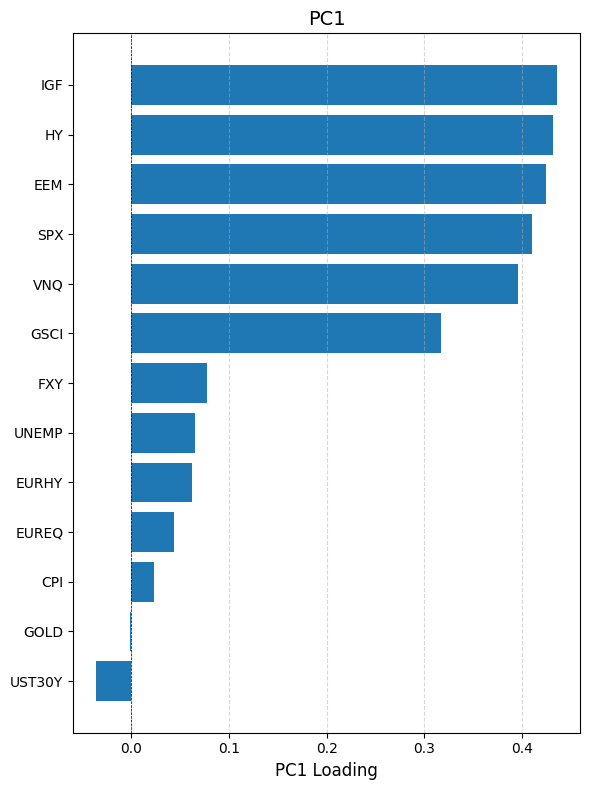

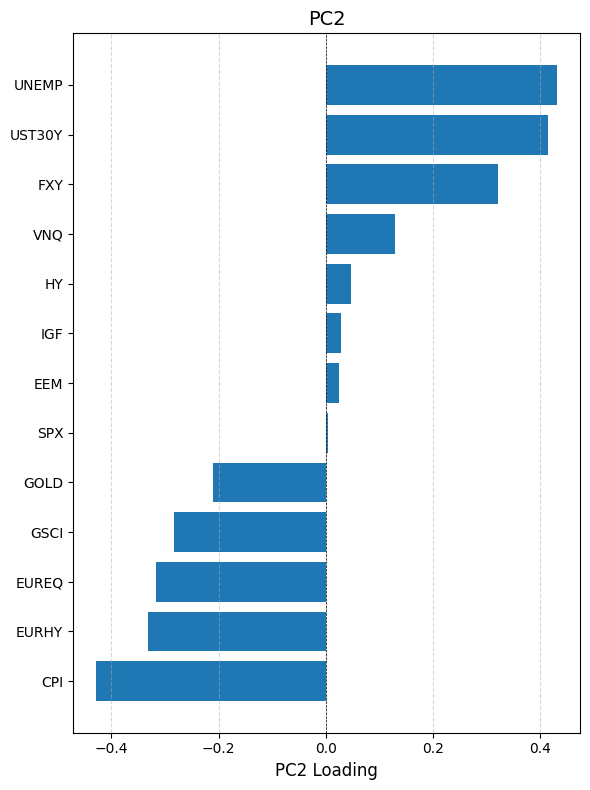

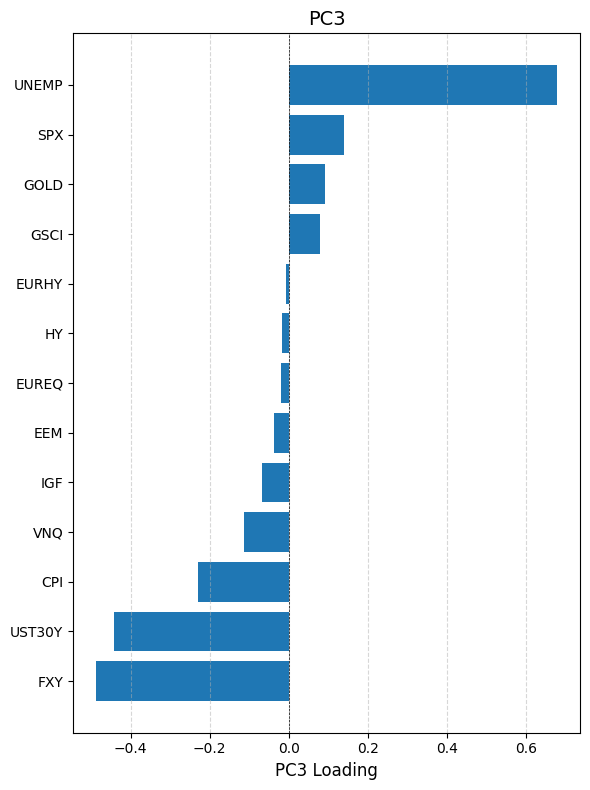

In [61]:
# Grab data in each row
row_list = [0, 1, 2]

for row in row_list: 
    # Take relevant PC (e.g., PC1), transpose and sort by value descending
    df_factor_loadings = pca_wts.iloc[[row]].T  # First row, transposed
    df_factor_loadings.columns = [f'PC{row+1}']    # Rename the column for clarity
    df_factor_loadings = df_factor_loadings.sort_values(by=f'PC{row+1}', ascending=True)

    # Plot horizontal bar chart
    plt.figure(figsize=(6, 8))
    plt.barh(df_factor_loadings.index, df_factor_loadings[f'PC{row+1}'])

    plt.title(f'PC{row+1}', fontsize=14)
    plt.xlabel(f'PC{row+1} Loading', fontsize=12)
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # y-axis at 0
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()